<a href="https://www.kaggle.com/code/tusharaggarwal27/nlp-twitter-sentiment-analysis?scriptVersionId=120943734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
          🐥🎯NLP: Twitter Sentiment Analysis🐥🎯
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>

<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width:270px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>


<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this notebook, I am building a model to predict sentiment from thousands of tweets</b>
    
  </div>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    <b>🐥🎯NLP: Twitter Sentiment Analysis🐥🎯</b>
</p>
 

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Importing the required packages</b>

In [1]:
#Data manipulation imports
import numpy as np
import pandas as pd

#Data Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Modeling imports
from sklearn.model_selection import train_test_split

#Additional imports
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Loading and checking the data</b>

In [2]:
#Loading and printing head of df
tweet =pd.read_csv("/kaggle/input/nlptwitter/twitter.csv",index_col=None)
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#Chekcing summary of the tweet df
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
#Checking for statistical info
tweet.describe(include='O')

,tweet
count,31962
unique,29530
top,#model i love u take with u all the time in ...
freq,319


In [5]:
#Dropping redundant columns
tweet = tweet.drop(['id'], axis=1)
tweet.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Some EDA</b>

label    0
tweet    0
dtype: int64

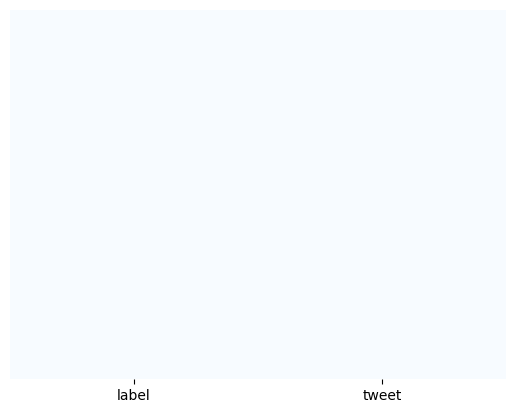

In [6]:
#Heatmap to find isnull
sns.heatmap(tweet.isnull(),yticklabels=False, cbar=False,cmap='Blues' )
#or
tweet.isna().sum().sort_values(ascending=False)

0    29720
1     2242
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

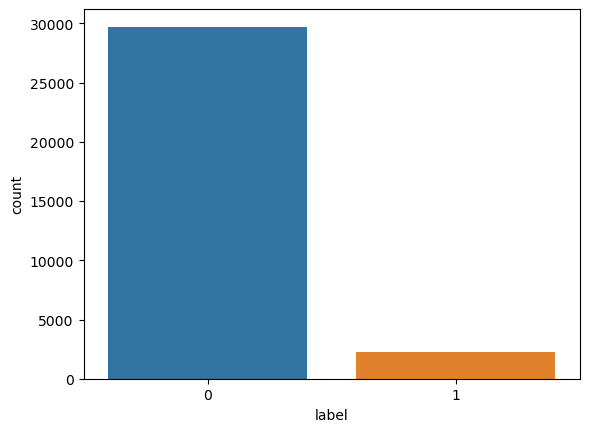

In [7]:
#Checking the balance of the Target variable
print(tweet['label'].value_counts())

#or
#Countplot for target valiable
sns.countplot(x='label', data=tweet, label='Count')

In [8]:
#Calculating and adding len of twwet['tweet']
tweet['len'] = tweet['tweet'].apply(len)
tweet.head()

,label,tweet,len
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [9]:
#Describing tweet df
tweet.describe(include='all')

,label,tweet,len
count,31962.000000,31962,31962.000000
unique,NaN,29530,NaN
top,NaN,#model i love u take with u all the time in ...,NaN
freq,NaN,319,NaN
mean,0.070146,NaN,84.739628
std,0.255397,NaN,29.455749
min,0.000000,NaN,11.000000
25%,0.000000,NaN,63.000000
50%,0.000000,NaN,88.000000
75%,0.000000,NaN,108.000000


In [10]:
#Checking for smallest, largest and average tweet
print(tweet[tweet['len']==11]['tweet'])
print('\n')
print(tweet[tweet['len']==274]['tweet'])
print('\n')
print(tweet[tweet['len']==84]['tweet'])

25195    i love you 
Name: tweet, dtype: object


19770     @user lmfao pathetic #soit   #growup #funny #...
Name: tweet, dtype: object


43       my mom shares the same bihday as @user   bihda...
220      g o a l s ð repost from @user #propey #ocea...
640      oscar tabarez talks luis suarezâs angry reac...
723       @user another hands &amp; feet complete!! ber...
742      because great things never came from comfo zon...
                               ...                        
31445    .@user on making choices to keep herself   as ...
31448    i'm a gordo. #passpo #florence #firenze #italy...
31509    just 3 keys that are found on your computer to...
31857    traveling happy #family   holidays #car #sunny...
31883    we spent #familytime by doing simple wefie, we...
Name: tweet, Length: 333, dtype: object


array([[<AxesSubplot:title={'center':'len'}>]], dtype=object)

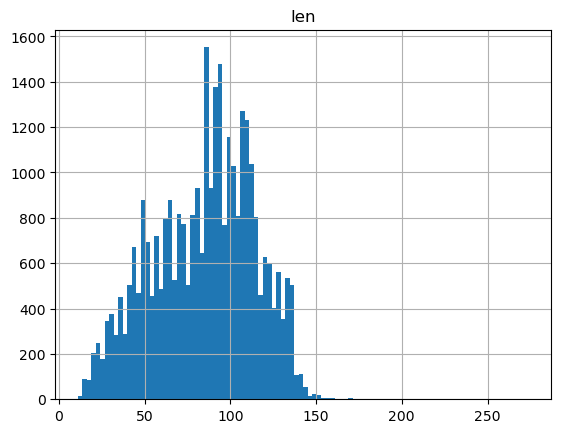

In [11]:
#Plotting histogram for len of tweets
tweet.hist('len', bins=100)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Some EDA with WordCloud</b>

In [12]:
%%time
#Categorising inot pos and neg
pos = tweet[tweet['label']==0]
neg = tweet[tweet['label']==1]

#creating sentences
sentences = tweet['tweet'].tolist()
len(sentences)

#now sentences as one string
sentence_joined = " ".join(sentences)
#print(sentence_joined)

CPU times: user 5.26 ms, sys: 1.06 ms, total: 6.32 ms
Wall time: 7.04 ms


In [13]:
#WordCloud
!pip install wordcloud

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


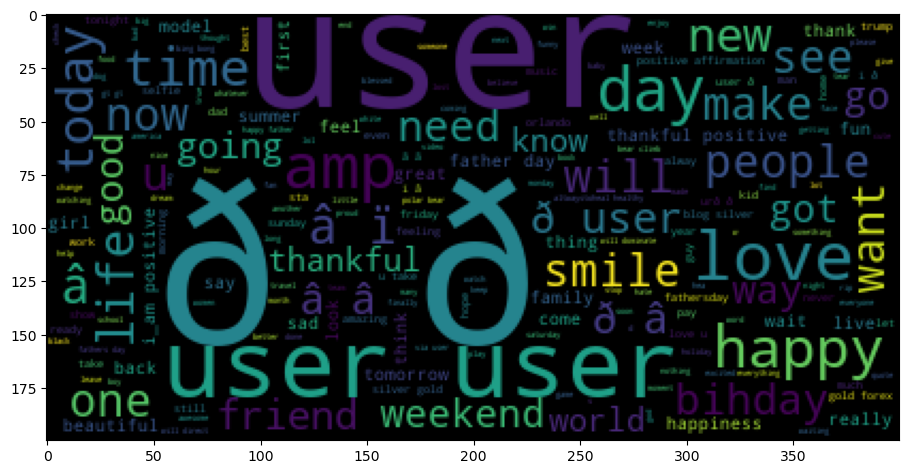

In [14]:
#Importing required
from wordcloud import WordCloud

#Creating combined wordcloud
plt.figure(figsize=(11,11))
plt.imshow(WordCloud().generate(sentence_joined))

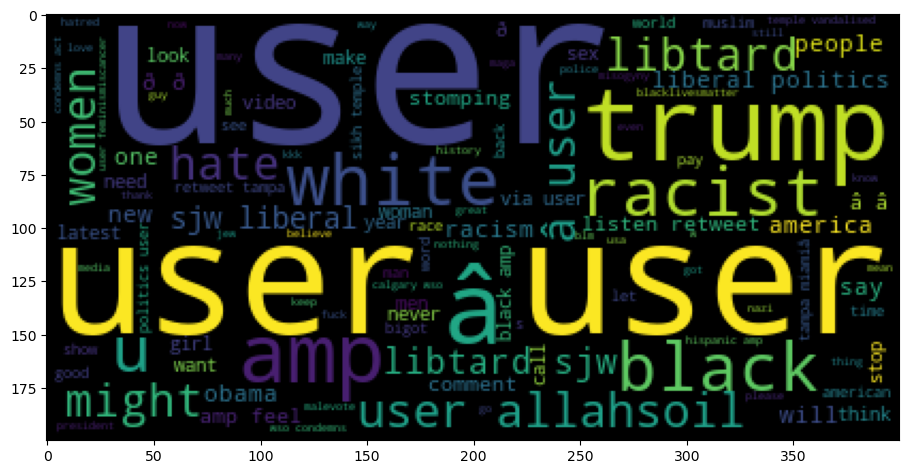

In [15]:
#Creating negative tweet wordcloud
sentences_neg = neg['tweet'].tolist()

#now neg sentences as one string
sentence_joined_neg = " ".join(sentences_neg)

plt.figure(figsize=(11,11))
plt.imshow(WordCloud().generate(sentence_joined_neg))

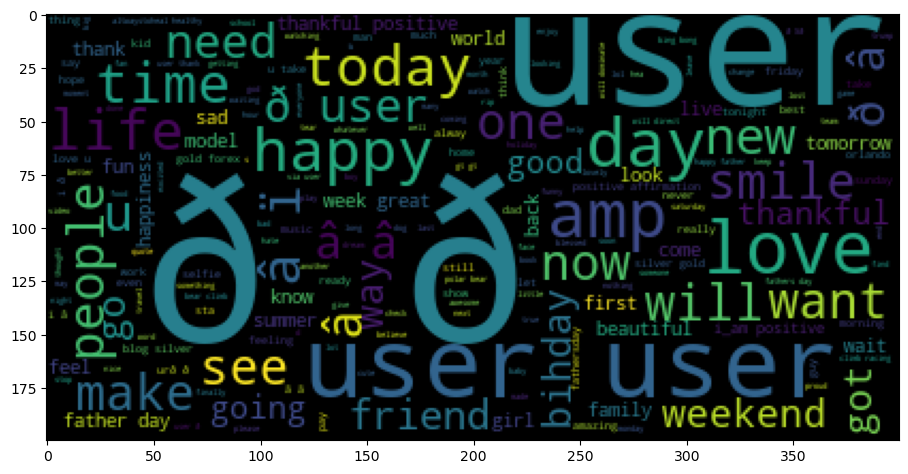

In [16]:
#Creating positive tweet wordcloud
sentences_pos = pos['tweet'].tolist()

#now neg sentences as one string
sentence_joined_pos = " ".join(sentences_pos)
plt.figure(figsize=(11,11))
plt.imshow(WordCloud().generate(sentence_joined_pos ))

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Data Wrangling</b>

In [19]:
#Importing string for punctuation examples
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
#Removing stop words

#Importing Natural Language Tool Kit
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
#For Stopwords
from nltk.corpus import stopwords
#stopwords.words('english')
#stopwords

In [ ]:
%%time
cleaned_sentences = [ char for char in sentence_joined if char not in string.punctuation]
cleaned_sentences = ' '.join(cleaned_sentences)
cleaned_sentences = [ word for word in cleaned_sentences.split() if word.lower() not in stopwords.words('english')]
cleaned_sentences = ''.join(cleaned_sentences)
print(cleaned_sentences)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Count vectorization(Tokenization)</b>

In [64]:
#Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Pipeline for punctuation>stopwords>tokenization</b>

In [72]:
#Defining cleaned_message for removing punctuation and stopwaords

def cleaned_message(message):
    clean_punc = [char for char in message if char not in string.punctuation]
    clean_punc_join = ''.join(clean_punc)
    clean_punc_stop = [ word for word in clean_punc_join.split() if word.lower() not in stopwords.words('english')]
    return clean_punc_stop

In [73]:
#Testing cleaned_message func
tweet_cleaned = tweet['tweet'].apply(cleaned_message)
print(tweet_cleaned)

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object


In [76]:
%%time
#Defining cleaning pipeline

vectorizer = CountVectorizer(analyzer=cleaned_message, dtype=np.uint8)
tweet_vectorizer = vectorizer.fit_transform(tweet['tweet'])

CPU times: user 39.6 s, sys: 4.82 s, total: 44.5 s
Wall time: 44.5 s


In [78]:
#print(vectorizer.get_feature_names())

In [80]:
print(tweet_vectorizer.toarray())
print('\n')
print(tweet_vectorizer.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(31962, 47386)


In [88]:
#Creating feature variable

X= pd.DataFrame(tweet_vectorizer.toarray())
#Checking
#print(X)
y=tweet['label']
#checking
#print(y)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Training and Evaluate Naive Bayes classifier</b>

In [89]:
#Checnking for shape
print(X.shape), print(y.shape)

(31962, 47386)
(31962,)


(None, None)

In [91]:
#Importing the required
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [101]:
#Splitting into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [102]:
#Fitting the model
NB_base = MultinomialNB()
NB_base.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

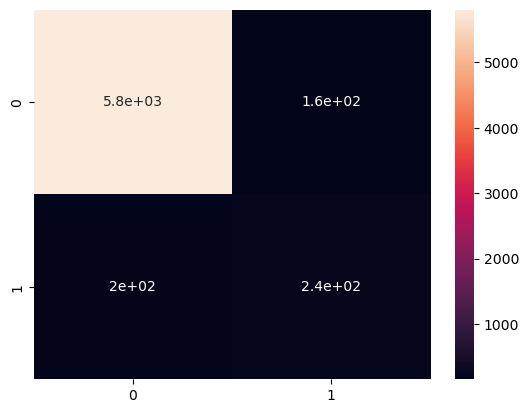

In [106]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred = NB_base.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5960
           1       0.60      0.55      0.57       433

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393



In [115]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))